In [1]:
from skimage import io
import matplotlib.pyplot as plt;
import numpy as np

255


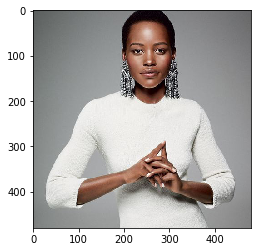

In [2]:
# Load original image
img = "./imgs/input/lupita.jpg"
img_data = io.imread(img)
print(np.max(img_data))
plt.imshow(img_data)
plt.show()

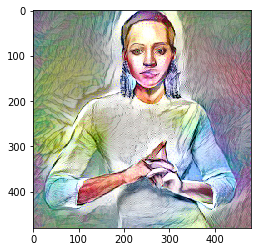

In [26]:
# Load pastiche
pastiche = './imgs/jointloss/lupitas6jointloss2e8.jpg'
pastiche_data = io.imread(pastiche)
plt.imshow(pastiche_data)
plt.show()


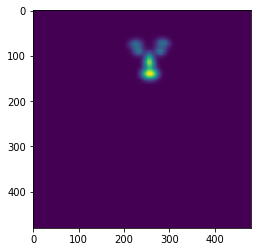

In [27]:
# Load face mask
face_mask = './imgs/face_masks_gaussian_noEnlarge/lupita_gaussian_face_mask_noEnlarge.jpg'
face_mask_data = io.imread(face_mask)
plt.imshow(face_mask_data)
plt.show()

In [28]:
# Apply face mask 
face_mask_data = face_mask_data[:, :, None]
face_mask_data = face_mask_data / 255.0 # scale down to be between 0 and 1
print(np.min(face_mask_data))         
print(np.max(face_mask_data))  


0.0
0.7254901960784313


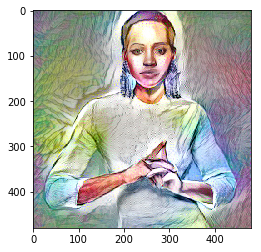

In [29]:
# Get stylized facial features

# First get contribution from original image
stylized_img_data = (img_data * face_mask_data)

# Second add on contribution from pastiche
stylized_img_data += (pastiche_data * (1.0 - face_mask_data))

plt.imshow(stylized_img_data.astype(int))
plt.show()


In [30]:
io.imsave('./imgs/jointloss_facial/lupitas6_final.jpg', stylized_img_data.astype(int))

/opt/anaconda3/envs/npenv/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: ./imgs/jointloss_facial/lupitas6_final.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
